In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.formula.api as smf
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#data import
da = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\2.4.2 drill data\table8.csv')

In [3]:
#first we need to fill in Nan values with 0 to avoid errors and get rid of the
#empty rows at the bottom
da.fillna(value=0)
da = da[0:348]

In [4]:
#Using print shows that the column names are not straight forward so let's
#edit them all, add them to a new dataframe and leave out the unnecessary
#columns
dp = []
dp = da[['Population']]
dp['Violent_Crime'] = da[['Violent\ncrime']]
dp['Murder'] = da[['Murder and\nnonnegligent\nmanslaughter']]
dp['Rape'] = da[['Rape\n(legacy\ndefinition)2']]
dp['Robbery'] = da[['Robbery']]
dp['Burglary'] = da[['Burglary']]
dp['Aggravated_Assault'] = da[['Aggravated\nassault']]
dp['Larceny_Theft'] = da[['Larceny-\ntheft']]
dp['Motor_Vehicle_Theft'] = da[['Motor\nvehicle\ntheft']]
dp['Arson'] = da[['Arson3']]
dp['Property_Crime'] = da[['Property\ncrime']]

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [5]:
#looking at the new dataframe, some of the columns are not in the same in the
#format we want. Let's get rid of unnecessary characters, replace the nans 
#with 0s and convert strings to integers 
dp['Arson'] = dp['Arson'].astype(str)
dp = dp.replace({r',': ''}, regex=True)
dp['Arson'] = dp.Arson.str.replace('nan','0')
dp = dp.apply(pd.to_numeric)

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
#from earlier evaluation, we need to drop some outliers
ds = dp[dp['Population'] < 40000]

In [7]:
#from earlier evaluation, these categories are more linearly related with this
#transformation
ds['Violent_Crime2'] = ds['Violent_Crime']**.5
ds['Rape2'] = ds['Rape']**.5

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
#there are now 318 rows so let us make a train dataframe with 70% of the data
#and a test dataframe with 30% of the data. since the original code is in alphabetcial
#order we shouldn't have to worry about skewness but lets plot a graph of both 
#to make sure
train = ds.loc[:223]
test = ds.loc[224:]

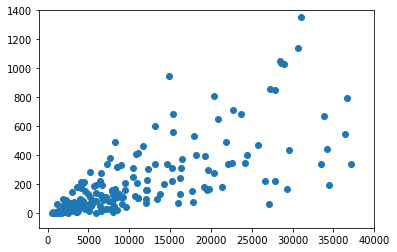

In [9]:
plt.scatter(train['Population'], train['Property_Crime'])
plt.axis((-1000,40000,-100,1400))
plt.show()

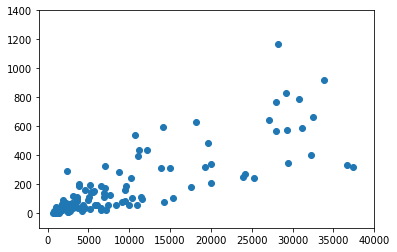

In [10]:
plt.scatter(test['Population'], test['Property_Crime'])
plt.axis((-1000,40000,-100,1400))
plt.show()


Coefficients: 
 [[  1.07264155e-02   3.89564917e+01   4.12493223e+01]]

Intercept: 
 [-47.00005626]

R-squared:
0.744484577933


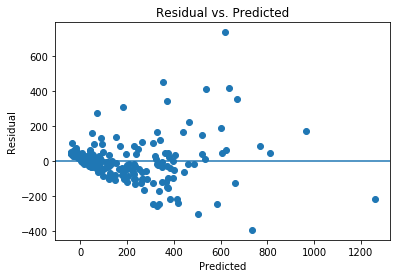

Intercept        -47.000
Population         0.011
Violent_Crime2    38.956
Rape2             41.249
dtype: float64
Intercept        0.001
Population       0.000
Violent_Crime2   0.000
Rape2            0.012
dtype: float64
0.744484577933
                     0       1
Intercept      -74.127 -19.873
Population       0.008   0.013
Violent_Crime2  26.466  51.447
Rape2            9.193  73.306


In [11]:
#lets run our initial linear regression
regr = linear_model.LinearRegression()
Y = train['Property_Crime'].values.reshape(-1, 1)
X = train[['Population', 'Violent_Crime2', 'Rape2']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

predicted = regr.predict(X).ravel()
actual = train['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
linear_formula = 'Property_Crime ~ Population+Violent_Crime2+Rape2'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=train).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)
print(lm.conf_int())


Coefficients: 
 [[  1.05379364e-02   5.11370859e+01]]

Intercept: 
 [-55.47298127]

R-squared:
0.736382324584


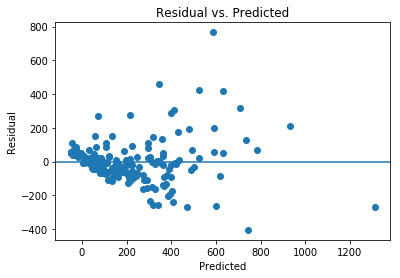

Intercept        -55.473
Population         0.011
Violent_Crime2    51.137
dtype: float64
Intercept        0.000
Population       0.000
Violent_Crime2   0.000
dtype: float64
0.736382324584
                     0       1
Intercept      -82.137 -28.809
Population       0.008   0.013
Violent_Crime2  42.880  59.394


In [12]:
#looks like even though rape has a high correlation, and does not encompass 0
#its individual r2 value is too high so lets remove it 
regr = linear_model.LinearRegression()
Y = train['Property_Crime'].values.reshape(-1, 1)
X = train[['Population', 'Violent_Crime2']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

predicted = regr.predict(X).ravel()
actual = train['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

linear_formula = 'Property_Crime ~ Population+Violent_Crime2'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=train).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)
print(lm.conf_int())


Coefficients: 
 [[  9.96868258e-03   4.22932620e+01]]

Intercept: 
 [-29.46531911]

R-squared:
0.735932136312


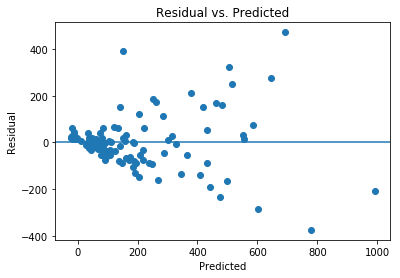

Intercept        -29.465
Population         0.010
Violent_Crime2    42.293
dtype: float64
Intercept        0.088
Population       0.000
Violent_Crime2   0.000
dtype: float64
0.735932136312
                     0      1
Intercept      -63.407  4.476
Population       0.006  0.013
Violent_Crime2  29.255 55.332


In [13]:
#now lets run the model on the test set
regr = linear_model.LinearRegression()
Y = test['Property_Crime'].values.reshape(-1, 1)
X = test[['Population', 'Violent_Crime2']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

predicted = regr.predict(X).ravel()
actual = test['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

linear_formula = 'Property_Crime ~ Population+Violent_Crime2'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=test).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)
print(lm.conf_int())

In [14]:
#change the test and train to a different portion of the data and retest
train2 = ds.loc[95:]
test2 = ds.loc[:94]


Coefficients: 
 [[  1.01639877e-02   4.72592326e+01]]

Intercept: 
 [-41.5593325]

R-squared:
0.713807406615


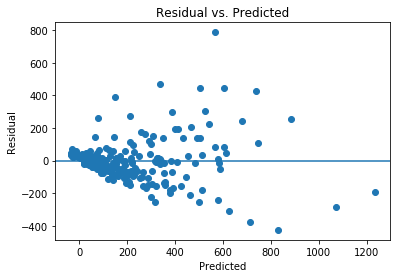

Intercept        -41.559
Population         0.010
Violent_Crime2    47.259
dtype: float64
Intercept        0.003
Population       0.000
Violent_Crime2   0.000
dtype: float64
0.713807406615
                     0       1
Intercept      -68.510 -14.609
Population       0.008   0.013
Violent_Crime2  38.826  55.693


In [15]:
regr = linear_model.LinearRegression()
Y = train2['Property_Crime'].values.reshape(-1, 1)
X = train2[['Population', 'Violent_Crime2']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

predicted = regr.predict(X).ravel()
actual = train2['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

linear_formula = 'Property_Crime ~ Population+Violent_Crime2'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=train2).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)
print(lm.conf_int())


Coefficients: 
 [[  9.85519017e-03   5.43370071e+01]]

Intercept: 
 [-59.7909601]

R-squared:
0.801233960794


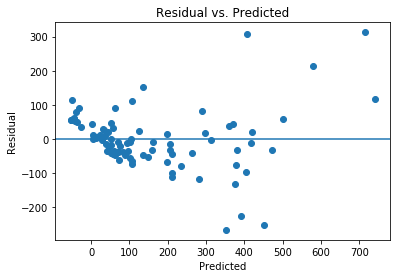

Intercept        -59.791
Population         0.010
Violent_Crime2    54.337
dtype: float64
Intercept        0.000
Population       0.000
Violent_Crime2   0.000
dtype: float64
0.801233960794
                     0       1
Intercept      -89.621 -29.961
Population       0.007   0.013
Violent_Crime2  42.312  66.362


In [16]:
regr = linear_model.LinearRegression()
Y = test2['Property_Crime'].values.reshape(-1, 1)
X = test2[['Population', 'Violent_Crime2']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

predicted = regr.predict(X).ravel()
actual = test2['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

linear_formula = 'Property_Crime ~ Population+Violent_Crime2'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=test2).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)
print(lm.conf_int())

In [17]:
#loading data for maryland instead of new york to run the model on and see
#if it carries over
dm = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\2.5.2 data\table_8.csv')

In [18]:
#identical data cleaning as before
dm =dm.loc[:76]
dm2 = []
dm2 = dm[['Population']]
dm2['Violent_Crime'] = dm[['Violent\ncrime']]
dm2['Murder'] = dm[['Murder and\nnonnegligent\nmanslaughter']]
dm2['Rape'] = dm[['Rape\n(legacy\ndefinition)2']]
dm2['Robbery'] = dm[['Robbery']]
dm2['Burglary'] = dm[['Burglary']]
dm2['Aggravated_Assault'] = dm[['Aggravated\nassault']]
dm2['Larceny_Theft'] = dm[['Larceny-\ntheft']]
dm2['Motor_Vehicle_Theft'] = dm[['Motor\nvehicle\ntheft']]
dm2['Arson'] = dm[['Arson']]
dm2['Property_Crime'] = dm[['Property\ncrime']]

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [19]:
dm2['Arson'] = dm2['Arson'].astype(str)
dm2 = dm2.replace({r',': ''}, regex=True)
dm2['Arson'] = dm2.Arson.str.replace('nan','0')
dm2 = dm2.apply(pd.to_numeric)

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


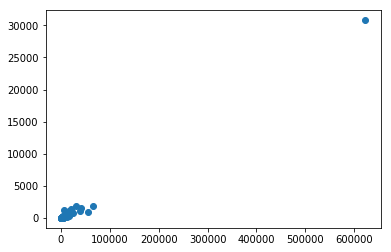

In [20]:
#get rid of outliers
plt.scatter(dm2['Population'], dm2['Property_Crime'])
plt.show()

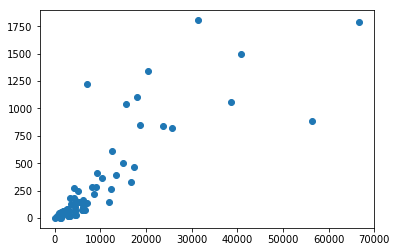

In [21]:
dm2 = dm2[dm2['Population'] < 100000]
plt.scatter(dm2['Population'], dm2['Property_Crime'])
plt.show()

(-50, 22000)

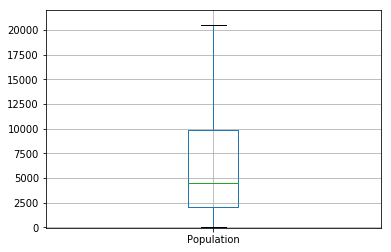

In [22]:
dm2.boxplot(column = 'Population')
plt.ylim(-50, 22000)

In [23]:
dm2 = dm2[dm2['Population'] < 23000]

In [24]:
#update the data
dm2['Violent_Crime2'] = dm2['Violent_Crime']**.5


Coefficients: 
 [[  1.86347432e-02   5.54241449e+01]]

Intercept: 
 [-132.87178792]

R-squared:
0.743923444396


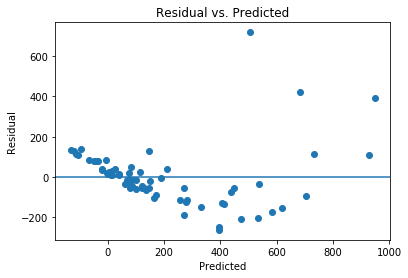

Intercept        -132.872
Population          0.019
Violent_Crime2     55.424
dtype: float64
Intercept        0.000
Population       0.004
Violent_Crime2   0.000
dtype: float64
0.743923444396
                      0       1
Intercept      -193.790 -71.953
Population        0.006   0.031
Violent_Crime2   34.765  76.083


In [25]:
regr = linear_model.LinearRegression()
Y = dm2['Property_Crime'].values.reshape(-1, 1)
X = dm2[['Population', 'Violent_Crime2']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

predicted = regr.predict(X).ravel()
actual = dm2['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

linear_formula = 'Property_Crime ~ Population+Violent_Crime2'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=dm2).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)
print(lm.conf_int())

Looks like the model we ran originally, while not good, still predicts data at the roughly the same accuracy across the used test and train sets as well as another set of data. 